<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/80x15.png" /></a><div align="center">This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.</div>

----

# Preamble

Normally, we would need to initialize a [`SparkContext`](https://jaceklaskowski.gitbooks.io/mastering-apache-spark/spark-SparkContext.html#creating-instance) in order to perform initialization.  However, this is automatically done in this IPython installation, so we skip this part. (Only *one* `SparkContext` object can be alive at the same time.)

In [1]:
#sc = SparkContext(appName="Python")

Evaluate the following cell to confirm that the PySpark kernel has been started correctly and that a `SparkContext` is already available in variable `sc`:

In [2]:
sc

<SparkContext master=yarn appName=pyspark-shell>

----

# What is the DataFrame API?

A new API for computing with structured data
(if it’s a table, it fits).

* Data in a DataFrame follows a specified “schema” (what type of data is in each column)
* Can give some nice performance improvements:
  - Spark can optimize the execution because it knows more about the data layout
  - most of the work can take place in the JVM without need to ship back and forth to Python
* Load and save data in a variety of formats, e.g. JSON, Parquet, SQL.

# Creating DataFrames

The entry point for the DataFrame API is called a [`SparkSession`](https://spark.apache.org/docs/2.2.1/api/python/pyspark.sql.html#pyspark.sql.SparkSession).

A `SparkSession` must be created from an active `SparkContext`:

```
# ‘sc‘ is the SparkContext
from pyspark.sql import SparkSession
spark = SparkSession(sc)
```

## Loading data

We are going to use public data from the [Wordbank project](http://wordbank.stanford.edu/) for examples in this notebook.

We can use PySpark's `spark.read.csv()` function to read a CSV file into a DataFrame: 

In [3]:
df = spark.read.csv("hdfs:///wordbank.csv.gz")

Method `.show()` on the DataFrame can be used to show the first few rows (by default 20):

In [4]:
df.show(10)

+----+-------+-----------+---+--------+------+-----------+---------+--------+---------+
| _c0|    _c1|        _c2|_c3|     _c4|   _c5|        _c6|      _c7|     _c8|      _c9|
+----+-------+-----------+---+--------+------+-----------+---------+--------+---------+
|null|data_id|num_item_id|age|language|   sex|birth_order|ethnicity|produces|     word|
|   0|  51699|         13| 27| English|Female|     Fourth| Hispanic|   False|alligator|
|   1|  51699|         14| 27| English|Female|     Fourth| Hispanic|    True|   animal|
|   2|  51699|         15| 27| English|Female|     Fourth| Hispanic|   False|      ant|
|   3|  51699|         16| 27| English|Female|     Fourth| Hispanic|    True|     bear|
|   4|  51699|         17| 27| English|Female|     Fourth| Hispanic|   False|      bee|
|   5|  51699|         18| 27| English|Female|     Fourth| Hispanic|    True|     bird|
|   6|  51699|         19| 27| English|Female|     Fourth| Hispanic|    True|      bug|
|   7|  51699|         20| 27| E

Other methods for reading data into a Spark DataFrame are:

* [`spark.read.json()`](https://spark.apache.org/docs/2.2.1/api/python/pyspark.sql.html#pyspark.sql.DataFrameReader.json): read data from a [JSON](https://www.json.org/) file
* [`spark.read.jdbc()`](https://spark.apache.org/docs/2.2.1/api/python/pyspark.sql.html#pyspark.sql.DataFrameReader.jdbc): read data from an SQL database
* [`spark.read.parquet()`](https://spark.apache.org/docs/2.2.1/api/python/pyspark.sql.html#pyspark.sql.DataFrameReader.parquet): read data from a [Parquet](https://parquet.apache.org/)-format directory
* [`spark.read.text()`](https://spark.apache.org/docs/2.2.1/api/python/pyspark.sql.html#pyspark.sql.DataFrameReader.text): read a text file; the resulting DataFrame has a single column `value`, and a row for each line of the input text.

All the above methods (except `read.jdbc`) accept a `hdfs://`, `file://` or any other URI format accepted by Spark, and can automatically decompress files.

Like in SQL, a DataFrame schema is a mapping *columns → column value type*.

Unlike SQL, Spark’s DataFrame objects allow composite columns (i.e., columns whose value is a list or tuple), so a the schema is a hierachical / tree-like structure.

Use the ‘.printSchema()’ method of a DataFrame
object to print a human-readable representation of its
schema.

In [5]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)



----

## Exercise 3.A

Read the documentation for the [`spark.read.csv`]() function and find out how to modify the above function call so that: *(1)* column names are taken from the first row (header) of the file; *(2)* column types are inferred from the data type.

In [9]:
df = spark.read.csv("hdfs:///wordbank.csv.gz", header=True, inferSchema=True)

If your way of reading data was right, evaluating the following cells should present a table with columnes `_c0`, `data_id`, `num_item_id`, `age`, ..., `produces`, `word`, of which the `_c0`, `data_id`, and `num_item_id` are integers, `produces` is boolean, and the rest are string-valued:

In [10]:
# look for headers and first values
df.show(5)

+---+-------+-----------+---+--------+------+-----------+---------+--------+---------+
|_c0|data_id|num_item_id|age|language|   sex|birth_order|ethnicity|produces|     word|
+---+-------+-----------+---+--------+------+-----------+---------+--------+---------+
|  0|  51699|         13| 27| English|Female|     Fourth| Hispanic|   false|alligator|
|  1|  51699|         14| 27| English|Female|     Fourth| Hispanic|    true|   animal|
|  2|  51699|         15| 27| English|Female|     Fourth| Hispanic|   false|      ant|
|  3|  51699|         16| 27| English|Female|     Fourth| Hispanic|    true|     bear|
|  4|  51699|         17| 27| English|Female|     Fourth| Hispanic|   false|      bee|
+---+-------+-----------+---+--------+------+-----------+---------+--------+---------+
only showing top 5 rows



In [11]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- data_id: integer (nullable = true)
 |-- num_item_id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- language: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- birth_order: string (nullable = true)
 |-- ethnicity: string (nullable = true)
 |-- produces: boolean (nullable = true)
 |-- word: string (nullable = true)



----

DataFrame objects can be created from an RDD of tuple/list/dict, Python list of the same, or pandas.DataFrame.

Unless using dict or pandas.DataFrame items, column names must be given:

In [12]:
ppl = spark.createDataFrame(
  [('Alice', 1), ('Bob', 2)],
  schema=['name', 'id'])

ppl.show()

+-----+---+
| name| id|
+-----+---+
|Alice|  1|
|  Bob|  2|
+-----+---+



A more realistic example:

In [13]:
# 1. create arrays of values
import math
xs = [(0.0 + 0.1*i) for i in range(20)]
cos_x = [math.cos(x) for x in xs]
sin_x = [math.sin(x) for x in xs]

# 2. create DataFrame with the given columns
trig = spark.createDataFrame(zip(xs, sin_x, cos_x), 
                             schema=['x', 'sin', 'cos'])

# 3. show a few sample columns
trig.show(5)

+-------------------+-------------------+------------------+
|                  x|                sin|               cos|
+-------------------+-------------------+------------------+
|                0.0|                0.0|               1.0|
|                0.1|0.09983341664682815|0.9950041652780258|
|                0.2|0.19866933079506122|0.9800665778412416|
|0.30000000000000004| 0.2955202066613396| 0.955336489125606|
|                0.4| 0.3894183423086505|0.9210609940028851|
+-------------------+-------------------+------------------+
only showing top 5 rows



### To and From PanDas DataFrames

[PanDas](http://pandas.pydata.org) provides the "standard" DataFrame implementation for Python.  PySpark can create DataFrames from PanDas ones (with `createDataFrame`).  Note that column names and types are automatically taken from PanDas.

In [6]:
import pandas as pd

xs = range(20)
ys = [x*x for x in xs]
pandas_df = pd.DataFrame({'x': xs, 'y': ys})

spark_df = spark.createDataFrame(pandas_df)

In [7]:
spark_df.show(3)

+---+---+
|  x|  y|
+---+---+
|  0|  0|
|  1|  1|
|  2|  4|
+---+---+
only showing top 3 rows



You can convert a Spark DataFrame to a PanDas DF by using method `.toPandas()`:

In [8]:
spark_df.toPandas().head()

,x,y
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16


### To and From RDDs

RDDs can be converted into Spark DataFrames; this operation requires specifying types:

In [2]:
rdd = sc.parallelize([('Alice', 1), ('Bob', 2)])

from pyspark.sql.types import StructType, StructField, StringType, IntegerType
spark_df = spark.createDataFrame(rdd, schema=StructType([
    StructField('name', StringType()),
    StructField('id', IntegerType())
]))

In [3]:
spark_df.show()

+-----+---+
| name| id|
+-----+---+
|Alice|  1|
|  Bob|  2|
+-----+---+



There are a few rules to follow here:

* `schema=...` is always an instance of `StructType()`
* `StructType(...)` contains a *list* of `StructField`*(name, dtype)*
* *dtype* is an *instance* of any of the type designators in module [`pyspark.sql.types`](https://spark.apache.org/docs/2.2.1/api/python/pyspark.sql.html#module-pyspark.sql.types)

You can grab the RDD underlying *any* DataFrame using the `.rdd` attribute:

In [4]:
spark_df.rdd

MapPartitionsRDD[10] at javaToPython at NativeMethodAccessorImpl.java:0

----

## Exercise 3.B

Modify the "word count" code of *Exercise 2.D* to return the word counts as a DataFrame instead of an RDD.

In [ ]:
# assuming we have a `wordcount()` function already defined

def wordcount2(source):
    from pyspark.sql.types import StructType, StructField, StringType, IntegerType
    rdd = wordcount(source)
    df = spark.createDataFrame(rdd, schema=StructType([
        StructField('word', StringType()),
        StructField('count', IntegerType()),
    ]))
    return df

----

# Table manipulations

As with RDDs, Spark DataFrames are **immutable**.

So, all transformations of an RDD return a *new* RDD and leave the original one unmodified.

(Hence, for example, removing a column does not really remove a column: it just returns a view on the original DF with one column omitted.)

## Removing columns

In order to do some data cleaning (and save memory), we drop the columns that are not used in the forthcoming analysis. A column may be deleted from the `DataFrame` with the method `.drop()`.

Columns may be removed by giving column names as strings:

    df2 = df.drop('_c0', 'num_item_id')
    
or as [`Column`](https://spark.apache.org/docs/2.2.1/api/python/pyspark.sql.html#pyspark.sql.Column) objects:

    df2 = df.drop(df._c0)

In [14]:
df2 = df.drop('_c0')

df2.show(4)

+-------+-----------+---+--------+------+-----------+---------+--------+---------+
|data_id|num_item_id|age|language|   sex|birth_order|ethnicity|produces|     word|
+-------+-----------+---+--------+------+-----------+---------+--------+---------+
|  51699|         13| 27| English|Female|     Fourth| Hispanic|   false|alligator|
|  51699|         14| 27| English|Female|     Fourth| Hispanic|    true|   animal|
|  51699|         15| 27| English|Female|     Fourth| Hispanic|   false|      ant|
|  51699|         16| 27| English|Female|     Fourth| Hispanic|    true|     bear|
+-------+-----------+---+--------+------+-----------+---------+--------+---------+
only showing top 4 rows



## Replacing values in columns

Method `.replace()` accept a Python dictionary mapping values that should be replaced with their replacements (**note:** 
they should have the same type!):

In [15]:
df2.replace({'Male':'0', 'Female':'1'}).show(3)

+-------+-----------+---+--------+---+-----------+---------+--------+---------+
|data_id|num_item_id|age|language|sex|birth_order|ethnicity|produces|     word|
+-------+-----------+---+--------+---+-----------+---------+--------+---------+
|  51699|         13| 27| English|  1|     Fourth| Hispanic|   false|alligator|
|  51699|         14| 27| English|  1|     Fourth| Hispanic|    true|   animal|
|  51699|         15| 27| English|  1|     Fourth| Hispanic|   false|      ant|
+-------+-----------+---+--------+---+-----------+---------+--------+---------+
only showing top 3 rows



You can restrict replacement to a subset of the columns with an additional `subset=...` argument:
```
df3 = df2.replace({'Male':'0', 'Female':'1'}, subset=['sex'])
```

If there is only one value to replace, a shortcut form is allowed:
```
df3 = df2.replace('English', 'en', subset=['language'])
```

## Selecting a subset of the columns (projection)

A subset of the columns may be chosen using the `.select()` method:

In [16]:
df2 = df.select(['age', 'language', 'sex'])

df2.show(5)

+---+--------+------+
|age|language|   sex|
+---+--------+------+
| 27| English|Female|
| 27| English|Female|
| 27| English|Female|
| 27| English|Female|
| 27| English|Female|
+---+--------+------+
only showing top 5 rows



It looks as if we've picked constant columns? A `Column`'s `.describe()` method returns a new DF with a quick statistical summary of the data:

In [17]:
df2.describe('age').show()

+-------+-----------------+
|summary|              age|
+-------+-----------------+
|  count|           234350|
|   mean|22.34275229357798|
| stddev|4.731628099530239|
|    min|               16|
|    max|               30|
+-------+-----------------+



Note that Spark will happily compute descriptive statistics for non-numeric columns as well!

In [18]:
df2.describe('language').show()

+-------+--------+
|summary|language|
+-------+--------+
|  count|  234350|
|   mean|    null|
| stddev|    null|
|    min| English|
|    max| English|
+-------+--------+



## Other transformations

All these methods return a new DF:

* `distinct(cols)`:  all unique rows of the source DF
* `dropDuplicates(cols)`: return new DF where all in the named columns are distinct; if no columns are given, default to all columns in the source DF.
* `orderBy(col)`: new DF sorted according to the given column expression

## Column expressions

The syntax *df.column* (e.g., `df2.age`) can be used to write logical, string, or arithmetic expressions involving column values.

Examples:

* `df.sex == 'Male'`
* `df.age * 12`

Such expressions expand to a new value for every row when used in `.select()` or `.where()`/`.filter()`.

A column expression may be suffixed with `.alias('name')` to give it a name in the resulting DF.

Create new DF with boolean column for age less/greater than 2 yrs:

In [19]:
df3 = df2.select(df.language, 'sex', df.age > 24)

df3.show(3)

+--------+------+----------+
|language|   sex|(age > 24)|
+--------+------+----------+
| English|Female|      true|
| English|Female|      true|
| English|Female|      true|
+--------+------+----------+
only showing top 3 rows



Create new DF with an additional column giving age in years:

In [20]:
df4 = df2.select('language', 'sex', (df.age / 12).cast('integer').alias('age_yrs'))

df4.show(3)

+--------+------+-------+
|language|   sex|age_yrs|
+--------+------+-------+
| English|Female|      2|
| English|Female|      2|
| English|Female|      2|
+--------+------+-------+
only showing top 3 rows



## Selection by rows

Boolean column expressions can be used with `.filter()` (also known as `.where()`) to create a new DF having only rows that match a predicate:

In [21]:
df5 = df2.where(df.sex=='Male')

df5.show(3)

+---+--------+----+
|age|language| sex|
+---+--------+----+
| 27| English|Male|
| 27| English|Male|
| 27| English|Male|
+---+--------+----+
only showing top 3 rows



----

## Exercise 3.C

Count the number of rows where column `'sex'` has the value `'Male'` and the count of rows where column `sex` has value `'Female'`.  Does this equal the total number of rows in the dataset?  If not, what other values for `sex` are there?

In [22]:
df.where(df.sex == 'Male').count()

89053

In [23]:
df.where(df.sex == 'Female').count()

83979

In [24]:
df.count() == df.where(df.sex == 'Male').count() + df.where(df.sex == 'Female').count()

False

In [25]:
df.select('sex').distinct().show()

+------+
|   sex|
+------+
|  null|
|Female|
|  Male|
+------+



----

## Null values

Columns can take the special value `null`, which is **never equal to any other value** (including itself), and uncomparable with other values (i.e., any relational operator returns `False`).

There are two ways of dealing with `null` values:

1. Use `.isNull()` and `.isNotNull()` to select rows with `null` is a `.where()` clause.
2. Use the `.fillna(val)` method to replace any occurrence of `null` with `val`; an optional list of columns where to apply the replacement can follow: 

```
     # only act on columns `c1` and `c2`
     df2 = df.fillna(val, ['c1', 'c2'])
```

## Grouping data and aggregate computations

Let us tackle the following problem: *compute how many words are uttered by children of a given age.*

Since each subject has many table entries (one per uttered word), then we need to:

* first, aggregate rows based on subject (`data_id`) **and** age, 
* then, compute the number of words per subject.  
* after, we can further aggregate on age alone and sum.

The [`.groupby()`]( https://spark.apache.org/docs/2.2.1/api/python/pyspark.sql.html#pyspark.sql.Column) method of `DataFrame`'s creates an intermediate object that is *like* a table with aggregate rows:

In [26]:
gd = df.groupby(['age', 'data_id'])

In [27]:
type(gd)

pyspark.sql.group.GroupedData

**Note:** as usual, one can use arbitrary column expressions, not just column names, in a `.groupBy()` argument list!

The only methods that we can call on a "groupby" object are those that apply a summarization function to the row groups.  

The available summarization functions are defined in module [`pyspark.sql.functions`]( https://spark.apache.org/docs/2.2.1/api/python/pyspark.sql.html#pyspark.sql.Column) (which must be imported!) and are called "aggregate functions" in the documentation.

Functions [`count()`](https://spark.apache.org/docs/2.2.1/api/python/pyspark.sql.html#pyspark.sql.functions.count),
[`mean()`](https://spark.apache.org/docs/2.2.1/api/python/pyspark.sql.html#pyspark.sql.functions.mean),
[`max()`](https://spark.apache.org/docs/2.2.1/api/python/pyspark.sql.html#pyspark.sql.functions.max),
[`min()`](https://spark.apache.org/docs/2.2.1/api/python/pyspark.sql.html#pyspark.sql.functions.min),
[`sum()`](https://spark.apache.org/docs/2.2.1/api/python/pyspark.sql.html#pyspark.sql.functions.sum) are of course present.


In [28]:
from pyspark.sql import functions as F

df3 = gd.agg(F.sum(df.produces.cast('integer')).alias('nr_words'))

# show it
df3.show(3)

+---+-------+--------+
|age|data_id|nr_words|
+---+-------+--------+
| 28|  52509|      37|
| 28|  52514|      43|
| 24|  52548|      40|
+---+-------+--------+
only showing top 3 rows



Note that the resulting DF has the aggregation columns *and* any column computed by `.agg()`.

----

## Exercise 3.D

Compute the total number of words uttered relative to age, for: all children, male children, female children.

In [29]:
# 1. aggregate
gd = df.groupBy('age')

# 2. sum over 'produces' column
df_ = gd.agg(F.sum(df.produces.cast('integer')).alias('nr_words'))


# 3. show
df_.show(5)

+---+--------+
|age|nr_words|
+---+--------+
| 28|   28143|
| 27|    5740|
| 26|    5011|
| 22|    4133|
| 16|    6032|
+---+--------+
only showing top 5 rows



In [30]:
# 1. aggregate
gd2 = df.groupBy(['age', 'sex'])

# 2. sum over 'produces' column
df_mf = gd2.agg(F.sum(df.produces.cast('integer')).alias('nr_words'))


# 3. show
df_mf.where(df_mf.sex == 'Male').show(5)

+---+----+--------+
|age| sex|nr_words|
+---+----+--------+
| 26|Male|    1773|
| 25|Male|    2571|
| 24|Male|    4843|
| 27|Male|    2032|
| 20|Male|    1296|
+---+----+--------+
only showing top 5 rows



## Exercise 3.E

Make a bar plot of the number of words produced by age.

(*Hint:* Seaborn provides an easy-to-use `.barplot` function)

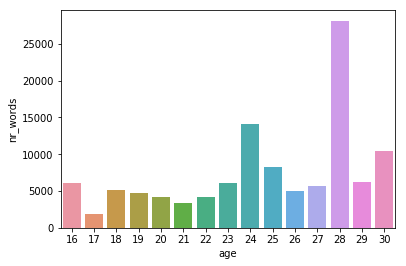

In [34]:
import seaborn as sns

sns.barplot(x="age", y="nr_words", data=df_.toPandas(), label="Nr. of distinct animal names")

A lengthier solution is to pull the data out using `df_.collect()` then separate the `x` and `y` arrays for the plot:

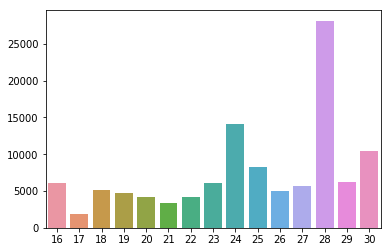

In [33]:
rows= df_.collect()

xs = [row[0] for row in rows]
ys = [row[1] for row in rows]

sns.barplot(x=xs, y=ys)